In [77]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [78]:
import os
from os import mkdir

#set the working directory 
root_dir = "/content/drive/My Drive/"

In [ ]:
os.mkdir('/content/drive/My Drive/Math_200_CodesTrial')

In [ ]:
pip install tensorflow

In [ ]:
!pip install fastquant
!pip install openpyxl
!pip install pandas

In [6]:
import fastquant as fq
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np

%matplotlib inline

In [7]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/usr/bin/python3
3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]
sys.version_info(major=3, minor=7, micro=15, releaselevel='final', serial=0)


#Data Gathering

We make a .xlsx file of all the companies listed in PSE. In this case, we consider only 5 companies first. The importance of this list is that it gathers all the stock symbols which will be used later on. We uploaded this file to github for easy reference.

In [9]:
ph_stocks_list = "https://github.com/earinon/TDA_Stocks/blob/main/5%20PSE%20Companies%20Trial.xlsx?raw=true"

df_ph_stocks = pd.read_excel(ph_stocks_list) #reads the excel file
print(df_ph_stocks.shape)
df_ph_stocks

(5, 6)


,Unnamed: 0,Company Name,Stock Symbol,Sector,Subsector,Unnamed: 5
0,1,"Aboitiz Equity Ventures, Inc.",AEV,Holding Firms,Holding Firms,"Nov 16, 1994"
1,2,"Alliance Global Group, Inc.",AGI,Holding Firms,Holding Firms,"Apr 19, 1999"
2,3,"Ayala Land, Inc.",ALI,Property,Property,"Jul 05, 1991"
3,4,"BDO Unibank, Inc.",BDO,Financials,Banks,"May 21, 2002"
4,5,First Gen Corporation,FGEN,Industrial,"Electricity, Energy, Power & Water","Feb 10, 2006"


In [10]:
#get stock codes as a list
all_ticker_list = df_ph_stocks['Stock Symbol'].to_list()

#number of stocks
len(all_ticker_list)

5

#Data Extraction

Using fastquant, we will extract stock data from PSE. We will consider first a timeframe of 2 years.

In [11]:
#set parameters for getting stock data 
start_date = "2020-01-01"
end_date = "2022-01-01"

In [12]:
#run for loop for getting stock data for each stock
stock_df_list = []          
stock_with_codes = []
for i in range(len(all_ticker_list)):
    stock_code = all_ticker_list[i]
    try: 
        stock_data = fq.get_pse_data(stock_code, start_date, end_date)
        stock_data = stock_data.reset_index()
        stock_data.insert(0, 'stock', stock_code)
        stock_df_list.append(stock_data)
        stock_with_codes.append(stock_code)
    except: 
        continue
    else:
        continue 

18it [00:13,  1.37it/s]
18it [00:10,  1.68it/s]
18it [00:10,  1.70it/s]
18it [00:10,  1.70it/s]
18it [00:16,  1.11it/s]


In [13]:
#Stacking up our dataframe
stock_df_list_table = pd.concat(stock_df_list)

In [ ]:
stock_df_list_table.to_csv('/content/drive/My Drive/Math_200_CodesTrial/stockPriceBatch1')

In [14]:
stock_df_list_table

,stock,dt,open,high,low,close,value,volume,dividend
0,AEV,2020-01-02,51.45,52.25,51.25,52.25,39031131.5,NaN,0
1,AEV,2020-01-03,52.25,53.20,51.65,52.35,63402692.0,NaN,0
2,AEV,2020-01-06,51.70,52.80,51.55,52.80,46381647.5,NaN,0
3,AEV,2020-01-07,52.00,52.85,51.65,52.50,27769479.5,NaN,0
4,AEV,2020-01-08,52.40,52.40,50.55,51.85,34874381.0,NaN,0
...,...,...,...,...,...,...,...,...,...
484,FGEN,2021-12-24,NaN,NaN,NaN,27.50,NaN,209900.0,0
485,FGEN,2021-12-27,NaN,NaN,NaN,27.45,NaN,160800.0,0
486,FGEN,2021-12-28,NaN,NaN,NaN,27.40,NaN,830700.0,0
487,FGEN,2021-12-29,NaN,NaN,NaN,27.55,NaN,70700.0,0


In [16]:
#Taking into account only the closing prices

stocks_closing_prices = stock_df_list_table[['stock','dt','close']]
stocks_closing_prices = stocks_closing_prices.reset_index()
stocks_closing_prices = stocks_closing_prices.drop('index', 1)
stocks_closing_prices

,stock,dt,close
0,AEV,2020-01-02,52.25
1,AEV,2020-01-03,52.35
2,AEV,2020-01-06,52.80
3,AEV,2020-01-07,52.50
4,AEV,2020-01-08,51.85
...,...,...,...
2440,FGEN,2021-12-24,27.50
2441,FGEN,2021-12-27,27.45
2442,FGEN,2021-12-28,27.40
2443,FGEN,2021-12-29,27.55


In [17]:
#check for NA values

NA_values_count = stocks_closing_prices['close'].isna().sum()
NA_values_count

3

In [18]:
#percentage of NA values in data set
NA_values_count/len(stocks_closing_prices.index)

0.001226993865030675

In [19]:
#check NA count and % per stock
NA_prices_filter = stocks_closing_prices[stocks_closing_prices['close'].isna()]
NA_prices_filter_bystock = NA_prices_filter.groupby('stock').count()
NA_prices_filter_bystock["na%"] = NA_prices_filter_bystock['dt']/629 
NA_prices_filter_bystock.sort_values(by=['na%'], inplace=True, ascending=False)
NA_prices_filter_bystock

,dt,close,na%
stock,,,
FGEN,3,0,0.004769


In [20]:
#filter stocks with NA % above 5 %
NA_prices_filter_bystock_above5 = NA_prices_filter_bystock[NA_prices_filter_bystock['na%'] > .05]
NA_prices_filter_bystock_above5
len(NA_prices_filter_bystock_above5.index)

0

In [21]:
#get list of stocks with NA % > 5, since they will be excluded

NA_exclude_stocks_list = NA_prices_filter_bystock_above5.index.tolist()
NA_exclude_stocks_list

[]

In [22]:
#exclude stocks with NA % > 5%
stocks_closing_prices_filtered = stocks_closing_prices[stocks_closing_prices['stock'].isin(NA_exclude_stocks_list) == False]
#len(stocks_closing_prices_filtered.index)
len(stocks_closing_prices_filtered.stock.unique())

5

In [23]:
#get the first day price of stock for the period covered in the dataset, which will be used as the baseline price for each stock
stocks_baseline_price = stocks_closing_prices_filtered.groupby('stock').first()
stocks_baseline_price = stocks_baseline_price.rename(columns = {'close':'baseline'})
stocks_baseline_price = stocks_baseline_price.reset_index()
stocks_baseline_price

,stock,dt,baseline
0,AEV,2020-01-02,52.25
1,AGI,2020-01-02,11.30
2,ALI,2020-01-02,44.90
3,BDO,2020-01-02,154.00
4,FGEN,2020-01-02,23.00


In [24]:
#check for NA price values
stocks_baseline_price['baseline'].isna().sum()

0

In [25]:
#check if all stocks have same start date
stocks_baseline_price['dt'].unique()

array(['2020-01-02T00:00:00.000000000'], dtype='datetime64[ns]')

In [26]:
#check NA values that will be imputed 

stocks_closing_prices_filtered[stocks_closing_prices_filtered['close'].isna()].head(10)

# row 1216 is NA for example

,stock,dt,close
2051,FGEN,2020-05-26,NaN
2359,FGEN,2021-08-27,NaN
2360,FGEN,2021-08-31,NaN


In [27]:
#compute mean of of closing prices per stock, which will be used for imputations
pd.set_option('display.max_rows', 20)
stocks_closing_prices_filtered['stock_close_mean'] = stocks_closing_prices_filtered.groupby(['stock']).close.transform('mean')
stocks_closing_prices_filtered.head(20)

,stock,dt,close,stock_close_mean
0,AEV,2020-01-02,52.25,44.896524
1,AEV,2020-01-03,52.35,44.896524
2,AEV,2020-01-06,52.80,44.896524
3,AEV,2020-01-07,52.50,44.896524
4,AEV,2020-01-08,51.85,44.896524
5,AEV,2020-01-09,51.80,44.896524
6,AEV,2020-01-10,52.00,44.896524
7,AEV,2020-01-14,52.00,44.896524
8,AEV,2020-01-15,52.40,44.896524
9,AEV,2020-01-16,53.00,44.896524


In [28]:
# Impute NA values with average opening price for opening prices 
stocks_closing_prices_filtered['close'] = stocks_closing_prices_filtered['close'].fillna(stocks_closing_prices_filtered['stock_close_mean'])

In [29]:
#check if NA values have been imputed

from google.colab import data_table
data_table.DataTable(stocks_closing_prices_filtered)

,stock,dt,close,stock_close_mean
0,AEV,2020-01-02,52.25,44.896524
1,AEV,2020-01-03,52.35,44.896524
2,AEV,2020-01-06,52.80,44.896524
3,AEV,2020-01-07,52.50,44.896524
4,AEV,2020-01-08,51.85,44.896524
...,...,...,...,...
2440,FGEN,2021-12-24,27.50,26.395638
2441,FGEN,2021-12-27,27.45,26.395638
2442,FGEN,2021-12-28,27.40,26.395638
2443,FGEN,2021-12-29,27.55,26.395638


In [31]:
# add baseline values as a column 
stocks_closing_prices_w_index = pd.merge(stocks_closing_prices_filtered, stocks_baseline_price[['stock','baseline']], on = 'stock', how = 'left')
stocks_closing_prices_w_index 

,stock,dt,close,stock_close_mean,baseline
0,AEV,2020-01-02,52.25,44.896524,52.25
1,AEV,2020-01-03,52.35,44.896524,52.25
2,AEV,2020-01-06,52.80,44.896524,52.25
3,AEV,2020-01-07,52.50,44.896524,52.25
4,AEV,2020-01-08,51.85,44.896524,52.25
...,...,...,...,...,...
2440,FGEN,2021-12-24,27.50,26.395638,23.00
2441,FGEN,2021-12-27,27.45,26.395638,23.00
2442,FGEN,2021-12-28,27.40,26.395638,23.00
2443,FGEN,2021-12-29,27.55,26.395638,23.00


In [32]:
# Compute stock index column
stocks_closing_prices_w_index['stock_index'] = stocks_closing_prices_w_index['close'] / stocks_closing_prices_w_index['baseline'] 
stocks_closing_prices_w_index

,stock,dt,close,stock_close_mean,baseline,stock_index
0,AEV,2020-01-02,52.25,44.896524,52.25,1.000000
1,AEV,2020-01-03,52.35,44.896524,52.25,1.001914
2,AEV,2020-01-06,52.80,44.896524,52.25,1.010526
3,AEV,2020-01-07,52.50,44.896524,52.25,1.004785
4,AEV,2020-01-08,51.85,44.896524,52.25,0.992344
...,...,...,...,...,...,...
2440,FGEN,2021-12-24,27.50,26.395638,23.00,1.195652
2441,FGEN,2021-12-27,27.45,26.395638,23.00,1.193478
2442,FGEN,2021-12-28,27.40,26.395638,23.00,1.191304
2443,FGEN,2021-12-29,27.55,26.395638,23.00,1.197826


In [ ]:
#extract data frames as csv to save the data
stocks_closing_prices_w_index.to_csv('/content/drive/My Drive/Math_200_CodesTrial/ClosingPrice')

#Create Stock Close Matrix with stocks as rows and dates as columns

In [33]:
stock_close_matrix = stocks_closing_prices_filtered[['dt','stock','close']].pivot(index='dt', columns='stock', values='close')
stock_close_matrix

stock,AEV,AGI,ALI,BDO,FGEN
dt,,,,,
2020-01-02,52.25,11.30,44.90,154.0,23.00
2020-01-03,52.35,11.30,44.75,155.0,23.00
2020-01-06,52.80,11.08,44.15,155.0,22.55
2020-01-07,52.50,11.20,44.20,155.0,22.05
2020-01-08,51.85,11.02,44.05,152.0,21.85
...,...,...,...,...,...
2021-12-24,56.50,12.00,35.25,123.0,27.50
2021-12-27,58.00,11.96,35.65,125.3,27.45
2021-12-28,59.05,12.16,35.05,125.0,27.40


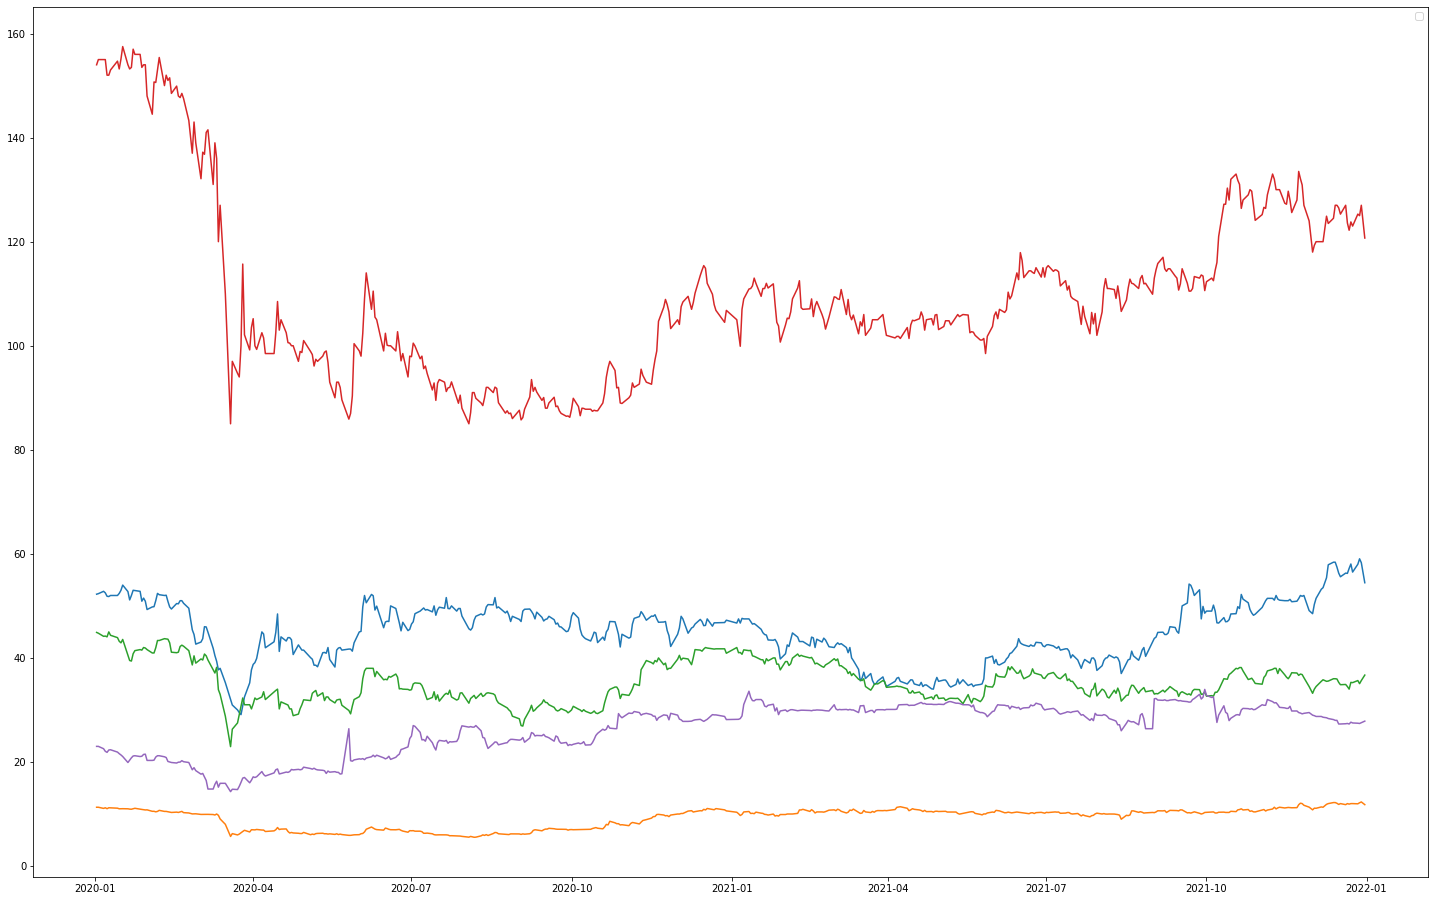

In [33]:
#Plot of time series stock data of 5 companies from 2020-2022

plt.figure(figsize = [25,16])
plt.plot(stock_close_matrix)
#plt.ylim(0, 2)

plt.legend()
plt.show()

#What happens next?

Now that we have our desired data to analyse, what are the next steps in order to apply TDA?

Method 1: Raw Data --> Correlation Matrix --> Euclidian Metric --> TDA
Method 2: Raw Data --> Point Cloud --> TDA
    
* Transforming raw data to point cloud includes sliding window and Taken's embedding

#Method 1

In [36]:
#Use Tensorflow to compute for the derivatives of time series data
import tensorflow as tf

stock_close_matrix_diff = stock_close_matrix.diff(periods=1)
stock_close_matrix

stock,AEV,AGI,ALI,BDO,FGEN
dt,,,,,
2020-01-02,52.25,11.30,44.90,154.0,23.00
2020-01-03,52.35,11.30,44.75,155.0,23.00
2020-01-06,52.80,11.08,44.15,155.0,22.55
2020-01-07,52.50,11.20,44.20,155.0,22.05
2020-01-08,51.85,11.02,44.05,152.0,21.85
...,...,...,...,...,...
2021-12-24,56.50,12.00,35.25,123.0,27.50
2021-12-27,58.00,11.96,35.65,125.3,27.45
2021-12-28,59.05,12.16,35.05,125.0,27.40


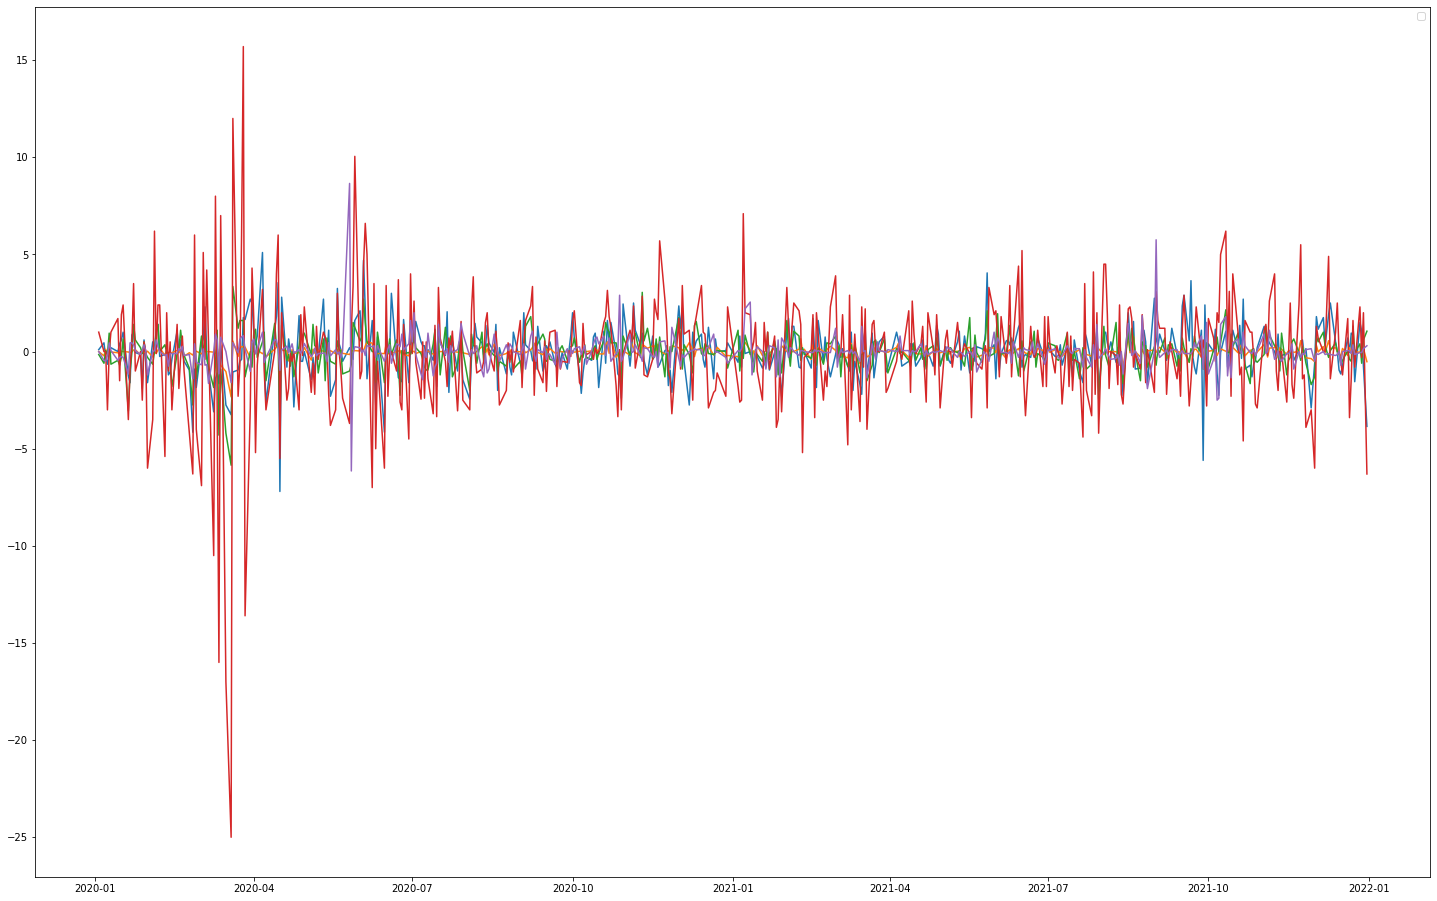

In [32]:
#
import matplotlib.pyplot as plt

plt.figure(figsize = [25,16])
plt.plot(stock_close_matrix_diff)
#plt.ylim(0, 2)

plt.legend()
plt.show()

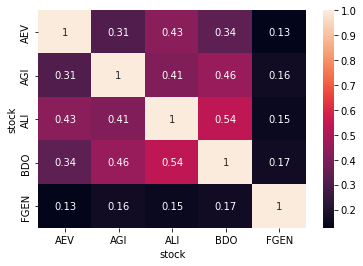

In [82]:
corr = stock_close_matrix_diff.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [34]:
print(corr)

stock       AEV       AGI       ALI       BDO      FGEN
stock                                                  
AEV    1.000000  0.307750  0.428922  0.339536  0.126732
AGI    0.307750  1.000000  0.410350  0.460656  0.164995
ALI    0.428922  0.410350  1.000000  0.538291  0.153472
BDO    0.339536  0.460656  0.538291  1.000000  0.166926
FGEN   0.126732  0.164995  0.153472  0.166926  1.000000


In [41]:
corr.iat[0,0]

1.0

In [83]:
corr_1 = corr
from math import sqrt
#Convert Correlation Matrix to Euclidean Distance using d=\sqrt{2(1-p)}

for i in range(0,5):
  p = corr_1.iat[i,0]
  d = sqrt(2*(1-p))
  corr_1['AEV'] = corr_1['AEV'].replace(p, d)
  i=i+1
print(corr_1)

corr_2=corr_1


stock       AEV       AGI       ALI       BDO      FGEN
stock                                                  
AEV    0.000000  0.307750  0.428922  0.339536  0.126732
AGI    1.176647  1.000000  0.410350  0.460656  0.164995
ALI    1.068717  0.410350  1.000000  0.538291  0.153472
BDO    1.149316  0.460656  0.538291  1.000000  0.166926
FGEN   1.321566  0.164995  0.153472  0.166926  1.000000


In [84]:
corr_2 = corr_1
from math import sqrt
#Convert Correlation Matrix to Euclidean Distance using d=\sqrt{2(1-p)}

for i in range(0,5):
  p = corr_2.iat[i,1]
  d = sqrt(2*(1-p))
  corr_2['AGI'] = corr_2['AGI'].replace(p, d)
  i=i+1
print(corr_2)

stock       AEV       AGI       ALI       BDO      FGEN
stock                                                  
AEV    0.000000  1.176647  0.428922  0.339536  0.126732
AGI    1.176647  0.000000  0.410350  0.460656  0.164995
ALI    1.068717  1.085956  1.000000  0.538291  0.153472
BDO    1.149316  1.038599  0.538291  1.000000  0.166926
FGEN   1.321566  1.292288  0.153472  0.166926  1.000000


In [85]:
corr_3 = corr_2
from math import sqrt
#Convert Correlation Matrix to Euclidean Distance using d=\sqrt{2(1-p)}

for i in range(0,5):
  p = corr_3.iat[i,2]
  d = sqrt(2*(1-p))
  corr_3['ALI'] = corr_3['ALI'].replace(p, d)
  i=i+1
print(corr_3)

stock       AEV       AGI       ALI       BDO      FGEN
stock                                                  
AEV    0.000000  1.176647  1.068717  0.339536  0.126732
AGI    1.176647  0.000000  1.085956  0.460656  0.164995
ALI    1.068717  1.085956  0.000000  0.538291  0.153472
BDO    1.149316  1.038599  0.960947  1.000000  0.166926
FGEN   1.321566  1.292288  1.301175  0.166926  1.000000


In [86]:
corr_4 = corr_3
from math import sqrt
#Convert Correlation Matrix to Euclidean Distance using d=\sqrt{2(1-p)}

for i in range(0,5):
  p = corr_4.iat[i,3]
  d = sqrt(2*(1-p))
  corr_4['BDO'] = corr_4['BDO'].replace(p, d)
  i=i+1
print(corr_4)

stock       AEV       AGI       ALI       BDO      FGEN
stock                                                  
AEV    0.000000  1.176647  1.068717  1.149316  0.126732
AGI    1.176647  0.000000  1.085956  1.038599  0.164995
ALI    1.068717  1.085956  0.000000  0.960947  0.153472
BDO    1.149316  1.038599  0.960947  0.000000  0.166926
FGEN   1.321566  1.292288  1.301175  1.290794  1.000000


In [87]:
corr_5 = corr_4
from math import sqrt
#Convert Correlation Matrix to Euclidean Distance using d=\sqrt{2(1-p)}

for i in range(0,5):
  p = corr_5.iat[i,4]
  d = sqrt(2*(1-p))
  corr_5['FGEN'] = corr_5['FGEN'].replace(p, d)
  i=i+1
print(corr_5)

stock       AEV       AGI       ALI       BDO      FGEN
stock                                                  
AEV    0.000000  1.176647  1.068717  1.149316  1.321566
AGI    1.176647  0.000000  1.085956  1.038599  1.292288
ALI    1.068717  1.085956  0.000000  0.960947  1.301175
BDO    1.149316  1.038599  0.960947  0.000000  1.290794
FGEN   1.321566  1.292288  1.301175  1.290794  0.000000


In [79]:
corr_5.to_csv('/content/drive/My Drive/Math_200_CodesTrial/DistanceMatrix')

In [ ]:
pip install gudhi

In [38]:
import numpy as np
import pandas as pd
import pickle as pickle
import gudhi as gd  
from pylab import *
%matplotlib inline

In [39]:
skeleton_protein = gd.RipsComplex(
    distance_matrix = corr_5.values, 
    max_edge_length = 0.8
) 

NameError: ignored

In [40]:
Rips_simplex_tree_protein = skeleton_protein.create_simplex_tree(max_dimension = 2)

NameError: ignored

In [90]:
Rips_simplex_tree_protein.dimension()

0

In [91]:
Rips_simplex_tree_protein.num_vertices()

5

In [92]:
Rips_simplex_tree_protein.num_simplices()

5

In [93]:
rips_filtration = Rips_simplex_tree_protein.get_filtration()
rips_list = list(rips_filtration)
len(rips_list)

5

In [94]:
for splx in rips_list[0:400] :
    print(splx)

([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)


In [96]:
from sklearn.manifold import MDS
 
embedding = MDS(n_components = 3, dissimilarity = 'precomputed')
X_transformed = embedding.fit_transform(corr_5)
X_transformed.shape

(5, 3)

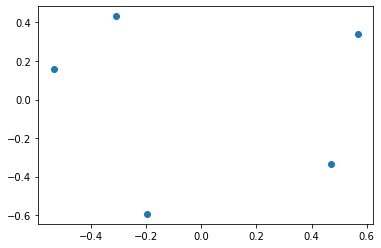

In [97]:
fig = plt.figure()
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], label = 'MDS');

In [34]:
pip install -U giotto-tda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.9 MB/s 
     |████████████████████████████████| 3.2 MB 37.0 MB/s 
     |████████████████████████████████| 529 kB 48.8 MB/s 
     |████████████████████████████████| 458 kB 30.5 MB/s 
     |████████████████████████████████| 1.6 MB 38.6 MB/s 


In [35]:
import numpy as np
import plotly.graph_objects as go

x_periodic = np.linspace(0, 10, 1000)
y_periodic = np.cos(5 * x_periodic)

fig = go.Figure(data=go.Scatter(x=x_periodic, y=y_periodic))
fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
fig.show()

In [36]:
from gtda.time_series import SingleTakensEmbedding

embedding_dimension_periodic = 3
embedding_time_delay_periodic = 8
stride = 10

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

In [ ]:
data_side = stock_close_matrix.head()

In [ ]:
list(data_side.index)

[Timestamp('2020-01-02 00:00:00'),
 Timestamp('2020-01-03 00:00:00'),
 Timestamp('2020-01-06 00:00:00'),
 Timestamp('2020-01-07 00:00:00'),
 Timestamp('2020-01-08 00:00:00')]

In [ ]:
data_top = list(stock_close_matrix.columns)
data_top

['AEV', 'AGI', 'ALI', 'BDO', 'FGEN']

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = [25,16])
plt.plot(stock_close_matrix)
#plt.ylim(0, 2)

plt.legend()
plt.show()

NameError: ignored

<Figure size 1800x1152 with 0 Axes>